In [100]:
# Writer Takashi
import math
import numpy as np

#Define
N = 600#半荘数
last_p = float(0.19)#収束ラス確率
real_per = 0.218#実際のラス率

#組み合わせ関数
def combinations_count(n, r):
    return math.factorial(n) // (math.factorial(n - r) * math.factorial(r))

# log(n!)を求める関数
def lnfact(n):
    sum = 0
    for i in np.arange(1, n+1, 1):
        sum += np.log(i)
    return sum

#半荘数Nに対してラスの数nとなる確率
def last_per(N,n):
    return np.exp((n*np.log(last_p) + (N-n)*np.log(1-last_p) + lnfact(N) - lnfact(N-n) - lnfact(n)))

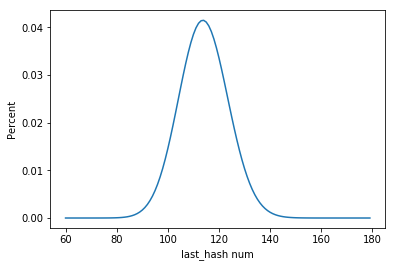

In [101]:
import numpy as np
import matplotlib.pyplot as plt

#各種パラメータ設定
N = 600#半荘数
min_per = 0.1#最低ラスハッシュ率
max_per = 0.3#最高ラスハッシュ率

x = np.empty(0)
for i in range(int(N*min_per),int(N*max_per)):
    x = np.append(x, last_per(N,i))

y = list(np.arange(N*min_per, N *max_per))

plt.xlabel("last_hash num")
plt.ylabel("Percent")
plt.plot(y,x)

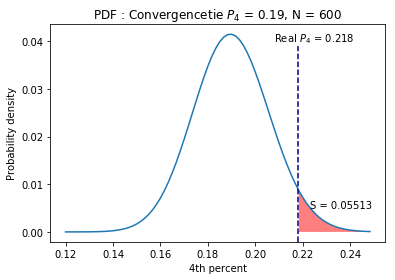

In [102]:
import numpy as np
import matplotlib.pyplot as plt

#各種パラメータ設定
N = 600#半荘数
min_per = 0.12#最低ラスハッシュ率
max_per = 0.25#最高ラスハッシュ率

#各ラス回数での確率計算
x = np.empty(0)
for i in range(int(N*min_per),int(N*max_per)):
    x = np.append(x, last_per(N,i))

#横軸の値作成
y = list(np.arange(N*min_per, N *max_per))
for i in range(len(y)):
    y[i] = y[i]/N
y = np.array(y)

#面積計算
#print(len(x))
sum=0

num = int(N*real_per - N*min_per)
#num = 110
for i in range(num):
    sum += x[i]
#print(num)
#print("last_num : " + str(N*real_per))

#グラフ化
plt.xlabel("4th percent")
plt.ylabel("Probability density")
plt.plot(y,x)
plt.title("PDF : Convergencetie $P_{4}$ = " + str(last_p) + ", N = " + str(N))

#補助線
plt.axvline(real_per, ymax=0.9, ls = "--", color = "navy")


plt.text(real_per-0.01, 0.04, "Real $P_{4}$ = "+str(real_per))
plt.text(real_per+0.005, 0.005, "S = " + str(round(1-sum,5)))
plt.fill_between(y, 0, x, 
                 where= y > real_per,
                 facecolor='red', 
                 alpha=0.5, label='fill')





In [26]:
#面積計算
print(len(x))
sum=0
real_per = 0.213#ッシュ率
num = int(N*real_per - N*min_per)
#num = 110
for i in range(num):
    sum += x[i]
print(sum)
print(num)
print("last_num : " + str(N*real_per))

120
0.9466009917354593
67
last_num : 127.8
